In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [65]:
filename = "./data/clean_dataset.csv"
df = pd.read_csv(filename)
len(df)

360

In [66]:
# Remove spaces in world port index (FR BES => FRBES) for consistency
df["code"] = df["code"].apply(lambda code: code.replace(" ", ""))

In [67]:
# Number of unique world port index

output_vocab = df["code"].unique()
print(len(output_vocab))

226


max occurences: 12 | min occurences: 1


/home/achraf/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Occurences des world port index'), Text(0.5, 0, 'occurences')]

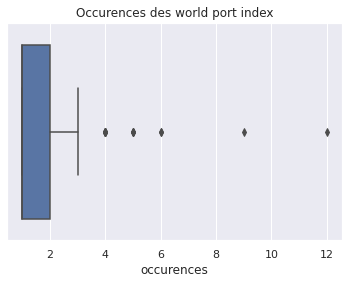

In [84]:
# Number of occurences by world port index

occurences = df.groupby(["code"])["input"].count()
print(f"max occurences: {occurences.max()} | min occurences: {occurences.min()}")
sns.boxplot(occurences.values).set(
    title="Occurences des world port index",
    xlabel="occurences"
)

In [70]:
print(f"World port index appearing once: {occurences[occurences == 1].count() / len(df.code.unique()):2.2%}")
print(f"World port index appearing < 3): {occurences[occurences <= 2].count() / len(df.code.unique()):2.2%}")

World port index appearing once: 70.35%
World port index appearing < 3): 86.28%


In [19]:
occurences[occurences > 3]

code
BEANR     5
BEZEE     4
ESBIO     4
ESSDR     5
FRBES     9
FRBOD     5
FRGVC     4
FRIRK     4
FRLEH     6
FRLRH     4
FRMTX     5
FRSML     6
GBPME     4
NLAMS     4
NLRTM    12
Name: input, dtype: int64

/home/achraf/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Occurences des world port index'),
 Text(0.5, 0, 'world port index'),
 Text(0, 0.5, 'occurences')]

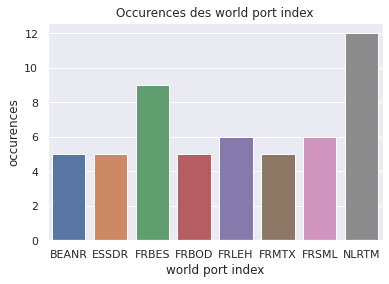

In [81]:
sns.barplot(
    occurences[occurences > 4].index, occurences[occurences > 4].values
).set(
    title="Occurences des world port index",
    xlabel="world port index",
    ylabel="occurences"
)

In [71]:
len(df[df["code"] == "NLRTM"]["input"].apply(lambda x: x.replace(" ", "")).unique())
len(df[df["code"] == "FRBES"]["input"].apply(lambda x: x.replace(" ", "")).unique())

9

In [78]:
list(df[df["code"] == "FRBES"]["input"].apply(lambda x: x.replace(" ", "")).unique())

['BREST',
 'RADEDEBREST',
 'BRESTPILOT',
 'BRESTFRANCE',
 'BREST,FRANCE',
 'RADEBREST',
 'BESFR',
 'BRESTF.O.',
 'BRESTFR']